In [9]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Exploring Data

In [82]:
#importing data
import pandas as pd
import numpy as np

bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [83]:
# Dropping columns instant, dteday, casual, registered since they are not relevant for analysing

bike = bike.drop(['instant','dteday','casual','registered'],axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


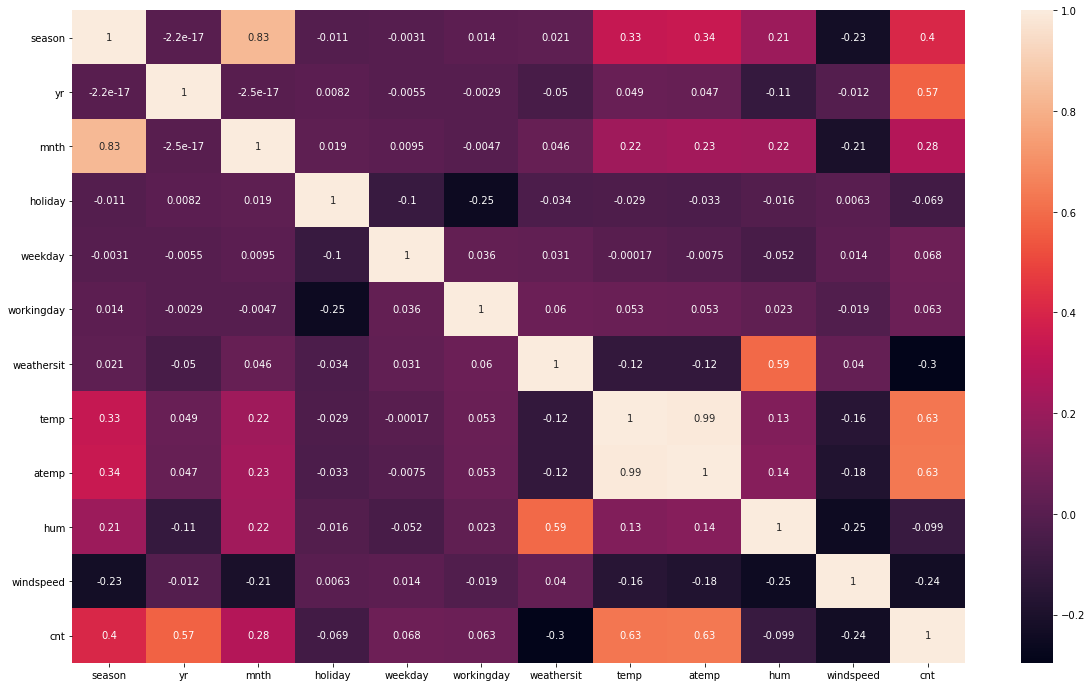

In [84]:
# Plotting correlation matrix between all variables

plt.figure(figsize=(20,12))

sns.heatmap(bike.corr(),annot=True)
plt.show()

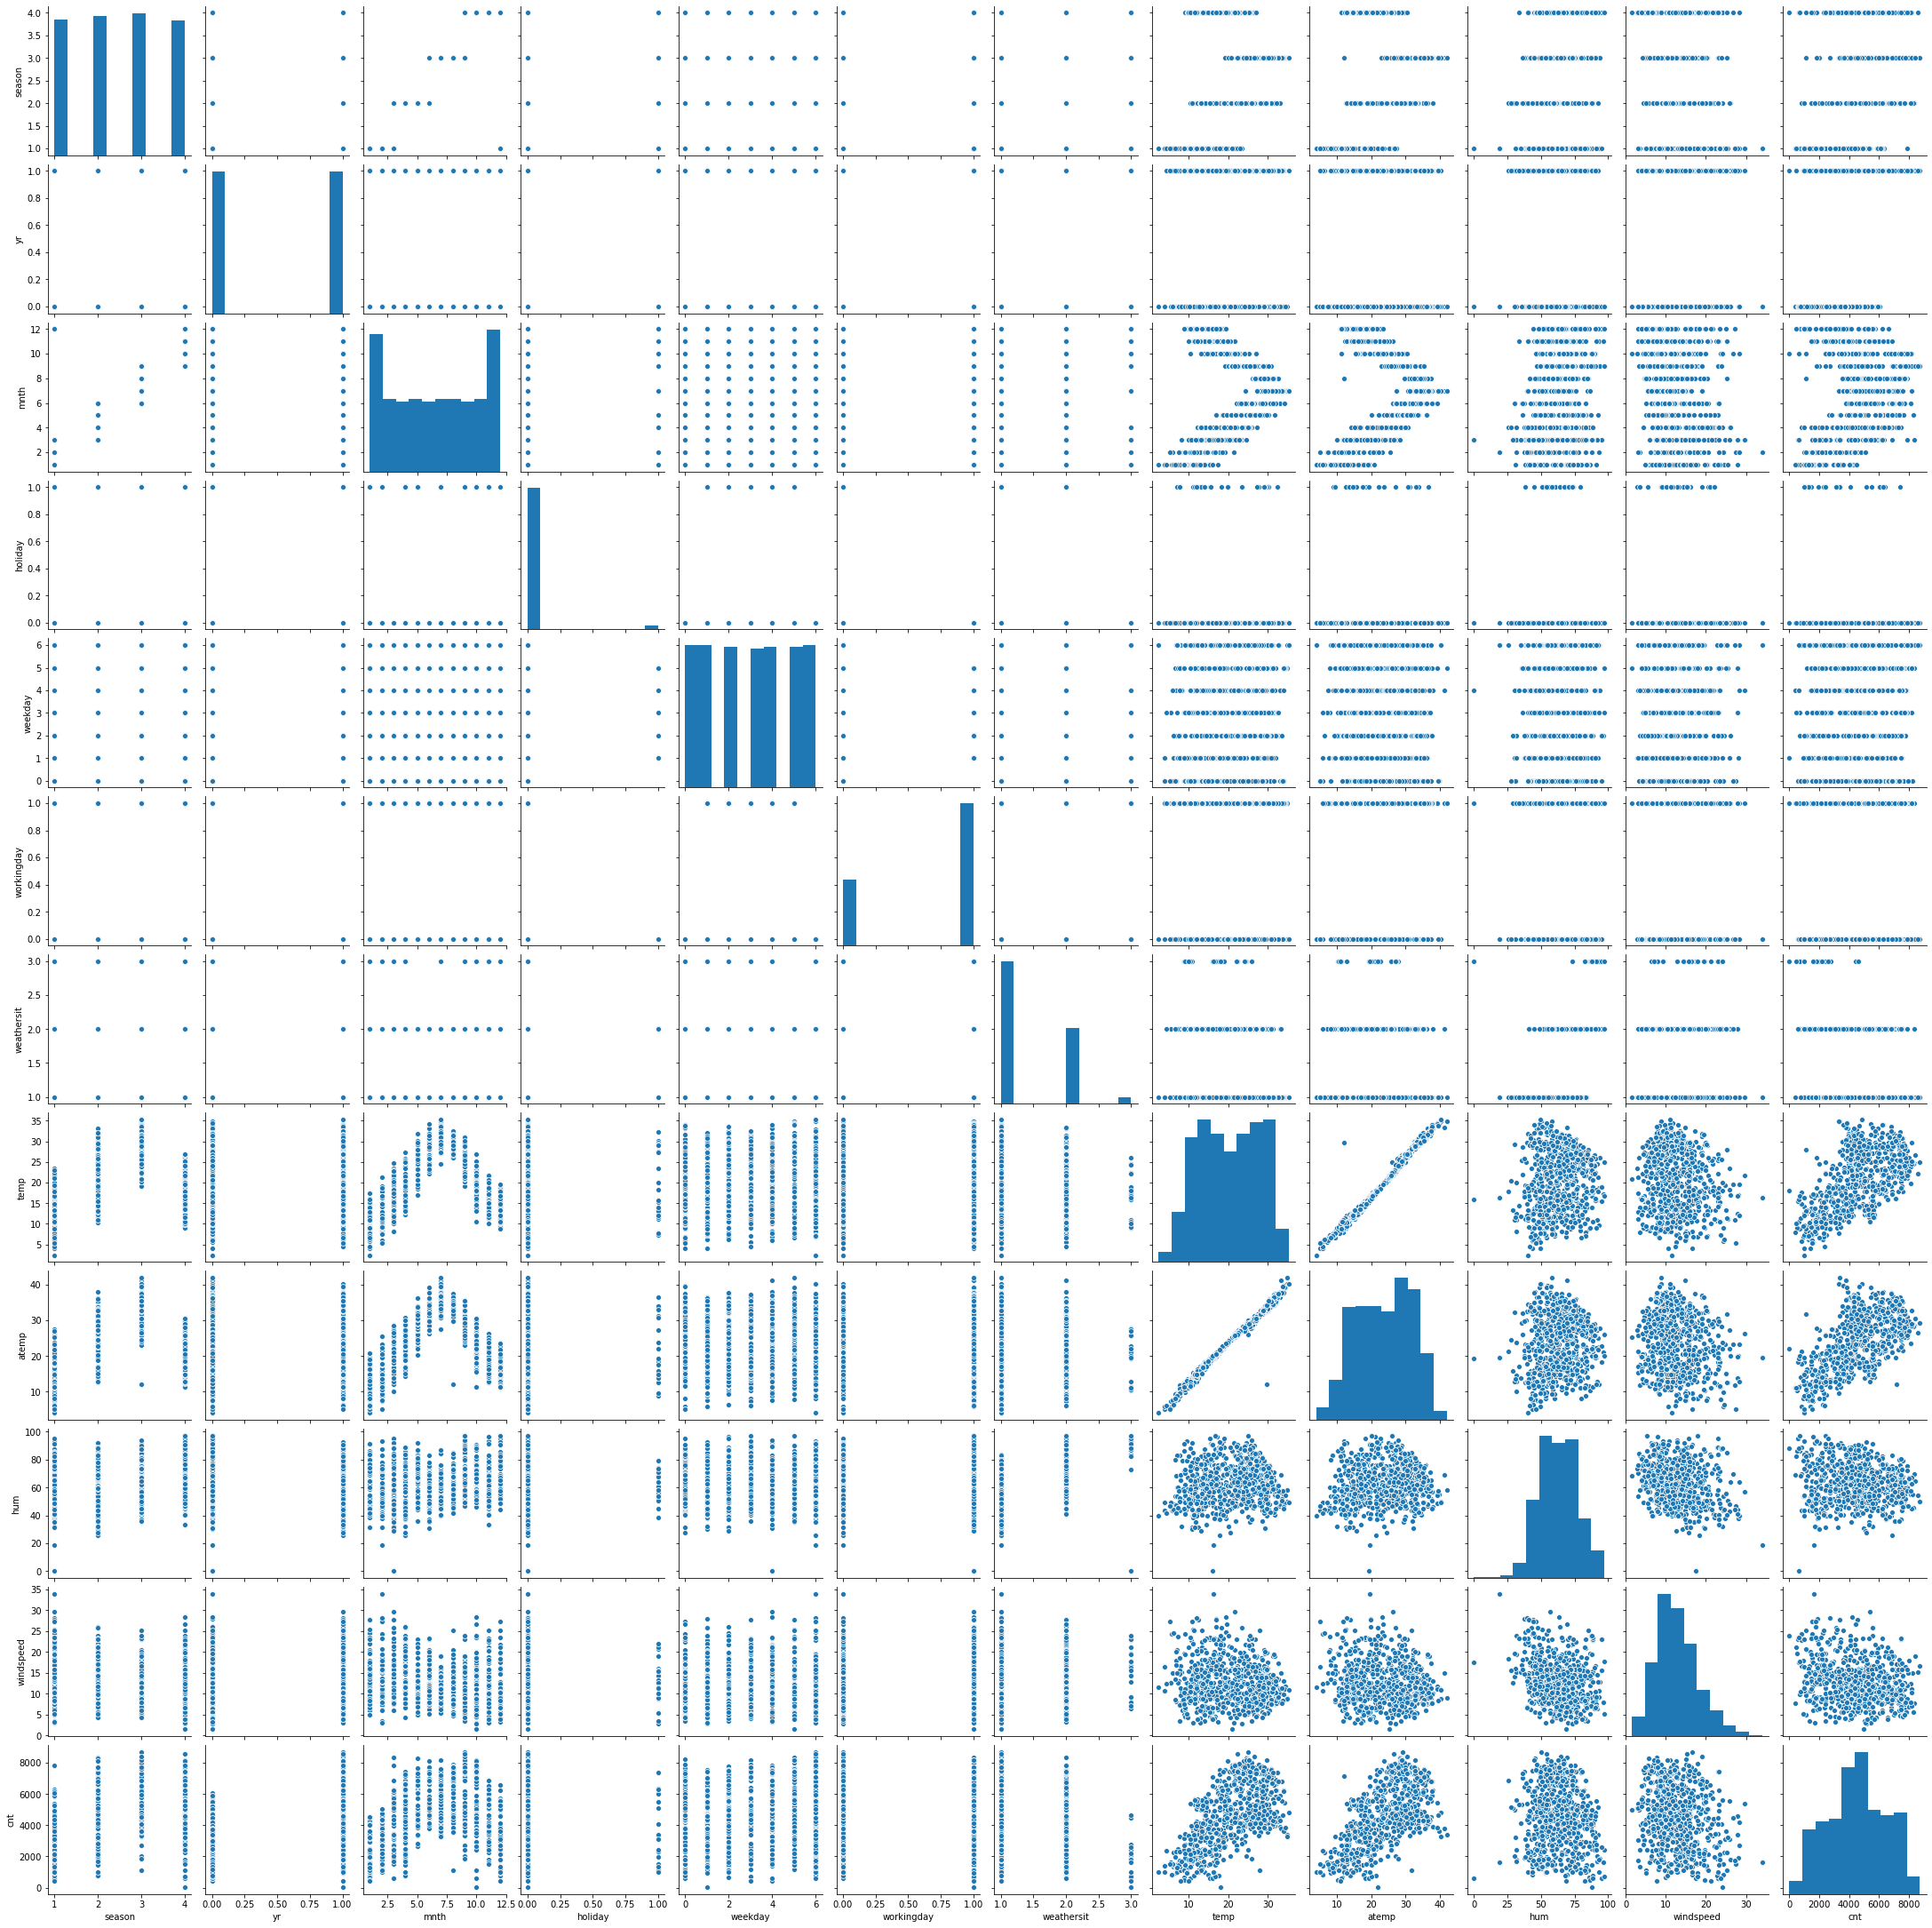

In [85]:
# plotting pair plot 

sns.pairplot(bike)
plt.show()

## Encoding Categorial Variables

In [86]:
# Creating dummy variables for the categorical variable

categorical_var = bike['yr']
categorical_var = pd.get_dummies(categorical_var,drop_first=True)

categorical_var.rename(columns={1:'year'})
categorical_var.head()

,1
0,0
1,0
2,0
3,0
4,0


In [87]:
bike = pd.concat([bike,categorical_var] ,axis=1)

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,1
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0


In [88]:
bike = bike.drop('yr',axis=1)
bike = bike.rename(columns={1:'year'})

In [89]:
workday = bike['workingday']

workday = pd.get_dummies(workday,drop_first=True)

workday.head()

,1
0,0
1,0
2,1
3,1
4,1


In [90]:
bike = pd.concat([bike,workday],axis=1)

bike = bike.rename(columns={1:'workday'})

bike.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,workday
0,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0
1,1,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0
2,1,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,1
3,1,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,1
4,1,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,1


In [91]:
bike.shape

(730, 13)

In [92]:
bike.describe()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,workday
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849,0.500000,0.683562
std,1.110184,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647,0.500343,0.465405
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.500000,1.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,1.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000


In [93]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
 11  year        730 non-null    uint8  
 12  workday     730 non-null    uint8  
dtypes: float64(4), int64(7), uint8(2)
memory usage: 64.3 KB


In [94]:
bike = bike.drop('workingday',axis=1)

In [95]:
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [96]:
season_col = bike['season']

season = pd.get_dummies(season_col,drop_first='True')
season.head()


,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [97]:
bike = pd.concat([bike,season],axis=1)

bike = bike.drop('season',axis=1)

bike = bike.rename(columns={2:'season2',3:'season3',4:'season4'})
bike.head()

,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,year,workday,season2,season3,season4
0,1,0,6,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0
2,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0
3,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0
4,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,0


In [98]:
Month = bike['mnth']
Month = pd.get_dummies(Month,drop_first=True)
Month.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [99]:
Month = Month.rename(columns={2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

Month.head()

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [100]:
bike= pd.concat([bike,Month],axis=1)

bike = bike.drop('mnth',axis=1)

bike.head()

,holiday,weekday,weathersit,temp,atemp,hum,windspeed,cnt,year,workday,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,6,2,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,0,0,0,0


In [101]:
weekd = bike['weekday']
weekd = pd.get_dummies(weekd,drop_first=True)
weekd.head()

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [102]:
weekd = weekd.rename(columns={1:'Tue',2:'wed',3:'thu',4:'Fri',5:'sat',6:'sun'})

bike = pd.concat([bike,weekd],axis=1)

bike = bike.drop('weekday',axis=1)

bike.head()

,holiday,weathersit,temp,atemp,hum,windspeed,cnt,year,workday,season2,...,Sep,Oct,Nov,Dec,Tue,wed,thu,Fri,sat,sun
0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [103]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [104]:
we = bike['weathersit']

we = pd.get_dummies(we,drop_first=True)

we.head()

,2,3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [105]:
we = we.rename(columns={2:'Mist',3:'Lightsnow'})

bike = pd.concat([bike,we],axis=1)

bike = bike.drop('weathersit',axis=1)

bike.head()

,holiday,temp,atemp,hum,windspeed,cnt,year,workday,season2,season3,...,Nov,Dec,Tue,wed,thu,Fri,sat,sun,Mist,Lightsnow
0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


## Scaling and Formatting

In [110]:
# Importing libraries

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [111]:
# scaling the numerics to minmax scaling

minmax = MinMaxScaler()

trainframe,testframe, = train_test_split(bike,train_size=0.7,random_state=100)

print(trainframe.shape)
print(testframe.shape)

trainframe.head(5)

(510, 30)
(220, 30)


,holiday,temp,atemp,hum,windspeed,cnt,year,workday,season2,season3,...,Nov,Dec,Tue,wed,thu,Fri,sat,sun,Mist,Lightsnow
576,0,29.246653,33.1448,70.4167,11.083475,7216,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
426,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
111,0,13.803347,16.0977,72.9583,14.707907,1683,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0


In [112]:
numerics = ['temp','atemp','hum','windspeed','cnt']

trainframe[numerics] = minmax.fit_transform(trainframe[numerics])

In [113]:
trainframe.describe()

,holiday,temp,atemp,hum,windspeed,cnt,year,workday,season2,season3,...,Nov,Dec,Tue,wed,thu,Fri,sat,sun,Mist,Lightsnow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.537440,0.513156,0.650480,0.320883,0.513499,0.507843,0.676471,0.247059,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.157763,0.225858,0.212410,0.145846,0.169803,0.224421,0.500429,0.468282,0.431725,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.542596,0.529718,0.653714,0.296763,0.518638,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the Model

In [114]:
# training the model 

y_train = trainframe.pop('cnt')

X_train = trainframe

## Building Model Using Recursion

In [115]:
# importing libraries

from sklearn.feature_selection import RFE

In [116]:
#feature selection using automated approach

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [117]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('year', True, 1),
 ('workday', True, 1),
 ('season2', True, 1),
 ('season3', True, 1),
 ('season4', True, 1),
 ('Feb', False, 7),
 ('Mar', False, 2),
 ('Apr', False, 4),
 ('May', False, 3),
 ('Jun', False, 5),
 ('Jul', False, 8),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 9),
 ('Dec', False, 10),
 ('Tue', False, 11),
 ('wed', False, 12),
 ('thu', False, 14),
 ('Fri', False, 15),
 ('sat', False, 13),
 ('sun', True, 1),
 ('Mist', True, 1),
 ('Lightsnow', True, 1)]

In [118]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'year', 'workday', 'season2',
       'season3', 'season4', 'Aug', 'Sep', 'Oct', 'sun', 'Mist', 'Lightsnow'],
      dtype='object')

In [119]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Nov', 'Dec', 'Tue',
       'wed', 'thu', 'Fri', 'sat'],
      dtype='object')

## Building Model Using Stats Model

In [120]:
X_train_rfe=X_train[col]

In [121]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [122]:
lm=sm.OLS(y_train,X_train_rfe).fit()

In [123]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.17e-191
Time:                        22:09:19   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1952      0.029      6.790      0.000       0.139       0.252
holiday       -0.0545      0.027     -2.025      0.043      -0.107      -0.002
temp           0.4972      0.034     14.821      0.000       0.431       0.563
hum           -0.1639      0.037     -4.395      0.000      -0.237      -0.091
windspeed     -0.1825      0.025     -7.196      0.000      -0.232      -0.133
year           0.2301      0.008     28.743      0.000       0.214       0.246
workday        0.0445      0.012      3.856      0.000       0.022       0.067
season2        0.1183      0.015      8.038      0.000       0.089       0.147
season3        0.0292      0.022      1.329      0.184      -0.014       0.072
season4        0.1430      0.013     10.671      0.000       0.117       0.169
Aug            0.0473      0.017      2.732      0.007       0.013       0.081
Sep            0.1176      0.017      6.876      0.000       0.084       0.151
Oct            0.0416      0.017      2.391      0.017       0.007       0.076
sun            0.0531      0.015      3.655      0.000       0.025       0.082
Mist          -0.0577      0.010     -5.564      0.000      -0.078      -0.037
Lightsnow     -0.2507      0.026     -9.579      0.000      -0.302      -0.199
==============================================================================
Omnibus:                       76.225   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.955
Skew:                          -0.743   Prob(JB):                     1.40e-44
Kurtosis:                       5.701   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
X_train_now = X_train_rfe.drop(['Aug'],axis=1)

In [132]:
X_train_lm = sm.add_constant(X_train_now)

lm=sm.OLS(y_train,X_train_lm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.45e-190
Time:                        22:25:37   Log-Likelihood:                 515.61
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     495   BIC:                            -937.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1892      0.029      6.558      0.000       0.133       0.246
holiday       -0.0543      0.027     -2.006      0.045      -0.108      -0.001
temp           0.4955      0.034     14.677      0.000       0.429       0.562
hum           -0.1565      0.037     -4.179      0.000      -0.230      -0.083
windspeed     -0.1821      0.026     -7.132      0.000      -0.232      -0.132
year           0.2311      0.008     28.698      0.000       0.215       0.247
workday        0.0457      0.012      3.942      0.000       0.023       0.069
season2        0.1184      0.015      7.989      0.000       0.089       0.147
season3        0.0512      0.021      2.489      0.013       0.011       0.092
season4        0.1446      0.013     10.733      0.000       0.118       0.171
Sep            0.0999      0.016      6.270      0.000       0.069       0.131
Oct            0.0399      0.018      2.276      0.023       0.005       0.074
sun            0.0550      0.015      3.765      0.000       0.026       0.084
Mist          -0.0566      0.010     -5.430      0.000      -0.077      -0.036
Lightsnow     -0.2543      0.026     -9.667      0.000      -0.306      -0.203
==============================================================================
Omnibus:                       82.988   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.183
Skew:                          -0.814   Prob(JB):                     1.88e-47
Kurtosis:                       5.734   Cond. No.                         21.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
X_train_new=X_train_lm.drop('Sep',axis=1)

X_train_m=sm.add_constant(X_train_new)

lm=sm.OLS(y_train,X_train_m).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.55e-183
Time:                        22:26:06   Log-Likelihood:                 496.12
No. Observations:                 510   AIC:                            -964.2
Df Residuals:                     496   BIC:                            -905.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1759      0.030      5.890      0.000       0.117       0.235
holiday       -0.0434      0.028     -1.547      0.122      -0.098       0.012
temp           0.4820      0.035     13.784      0.000       0.413       0.551
hum           -0.1305      0.039     -3.378      0.001      -0.206      -0.055
windspeed     -0.1834      0.026     -6.921      0.000      -0.235      -0.131
year           0.2315      0.008     27.701      0.000       0.215       0.248
workday        0.0476      0.012      3.954      0.000       0.024       0.071
season2        0.1213      0.015      7.890      0.000       0.091       0.151
season3        0.0802      0.021      3.862      0.000       0.039       0.121
season4        0.1547      0.014     11.139      0.000       0.127       0.182
Oct            0.0295      0.018      1.630      0.104      -0.006       0.065
sun            0.0570      0.015      3.765      0.000       0.027       0.087
Mist          -0.0566      0.011     -5.228      0.000      -0.078      -0.035
Lightsnow     -0.2528      0.027     -9.259      0.000      -0.306      -0.199
==============================================================================
Omnibus:                       77.679   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.437
Skew:                          -0.751   Prob(JB):                     3.32e-46
Kurtosis:                       5.757   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
X_train_new=X_train_m.drop('Oct',axis=1)

X_train_1=sm.add_constant(X_train_new)

lm=sm.OLS(y_train,X_train_1).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.1
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.95e-184
Time:                        22:26:29   Log-Likelihood:                 494.76
No. Observations:                 510   AIC:                            -963.5
Df Residuals:                     497   BIC:                            -908.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1714      0.030      5.755      0.000       0.113       0.230
holiday       -0.0455      0.028     -1.621      0.106      -0.101       0.010
temp           0.4948      0.034     14.499      0.000       0.428       0.562
hum           -0.1292      0.039     -3.341      0.001      -0.205      -0.053
windspeed     -0.1815      0.027     -6.844      0.000      -0.234      -0.129
year           0.2311      0.008     27.618      0.000       0.215       0.248
workday        0.0467      0.012      3.876      0.000       0.023       0.070
season2        0.1175      0.015      7.720      0.000       0.088       0.147
season3        0.0739      0.020      3.615      0.000       0.034       0.114
season4        0.1626      0.013     12.486      0.000       0.137       0.188
sun            0.0562      0.015      3.706      0.000       0.026       0.086
Mist          -0.0562      0.011     -5.183      0.000      -0.077      -0.035
Lightsnow     -0.2481      0.027     -9.123      0.000      -0.302      -0.195
==============================================================================
Omnibus:                       70.425   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.155
Skew:                          -0.699   Prob(JB):                     7.58e-40
Kurtosis:                       5.554   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [135]:
X_train_new=X_train_1.drop('sun',axis=1)
X_train_2=sm.add_constant(X_train_new)
lm=sm.OLS(y_train,X_train_2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.22e-182
Time:                        22:26:45   Log-Likelihood:                 487.81
No. Observations:                 510   AIC:                            -951.6
Df Residuals:                     498   BIC:                            -900.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2063      0.029      7.205      0.000       0.150       0.263
holiday       -0.0744      0.027     -2.725      0.007      -0.128      -0.021
temp           0.4949      0.035     14.320      0.000       0.427       0.563
hum           -0.1398      0.039     -3.579      0.000      -0.217      -0.063
windspeed     -0.1810      0.027     -6.739      0.000      -0.234      -0.128
year           0.2303      0.008     27.190      0.000       0.214       0.247
workday        0.0174      0.009      1.890      0.059      -0.001       0.035
season2        0.1176      0.015      7.626      0.000       0.087       0.148
season3        0.0746      0.021      3.604      0.000       0.034       0.115
season4        0.1626      0.013     12.329      0.000       0.137       0.189
Mist          -0.0530      0.011     -4.845      0.000      -0.075      -0.032
Lightsnow     -0.2413      0.027     -8.782      0.000      -0.295      -0.187
==============================================================================
Omnibus:                       59.476   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.267
Skew:                          -0.571   Prob(JB):                     5.81e-36
Kurtosis:                       5.516   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
X_train_new=X_train_2.drop('workday',axis=1)

X_train_3=sm.add_constant(X_train_new)

lm=sm.OLS(y_train,X_train_3).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          8.27e-183
Time:                        22:27:05   Log-Likelihood:                 485.99
No. Observations:                 510   AIC:                            -950.0
Df Residuals:                     499   BIC:                            -903.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2183      0.028      7.804      0.000       0.163       0.273
holiday       -0.0860      0.027     -3.224      0.001      -0.138      -0.034
temp           0.4960      0.035     14.316      0.000       0.428       0.564
hum           -0.1406      0.039     -3.590      0.000      -0.218      -0.064
windspeed     -0.1830      0.027     -6.802      0.000      -0.236      -0.130
year           0.2307      0.008     27.176      0.000       0.214       0.247
season2        0.1180      0.015      7.638      0.000       0.088       0.148
season3        0.0749      0.021      3.606      0.000       0.034       0.116
season4        0.1620      0.013     12.251      0.000       0.136       0.188
Mist          -0.0522      0.011     -4.761      0.000      -0.074      -0.031
Lightsnow     -0.2396      0.028     -8.701      0.000      -0.294      -0.185
==============================================================================
Omnibus:                       63.872   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.401
Skew:                          -0.644   Prob(JB):                     2.43e-35
Kurtosis:                       5.417   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step To make Sure Check VIF

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_nc=X_train_lm.drop('const',axis=1)

In [140]:
Vif=pd.DataFrame()

Vif['Features']=X_train_nc.columns

Vif['vif']=[variance_inflation_factor(X_train_nc.values,i) for i in range(X_train_nc.shape[1])]


Vif['vif']=round(Vif['vif'],2)

Vif.sort_values(by='vif',ascending=False)

,Features,vif
1,temp,24.04
2,hum,17.43
7,season3,7.07
5,workday,5.05
3,windspeed,3.88
6,season2,3.46
8,season4,2.85
12,Mist,2.14
4,year,2.04
11,sun,1.90


In [142]:
X_train_new=X_train_lm.drop('hum',axis=1)

X_train_5=sm.add_constant(X_train_new)

lm=sm.OLS(y_train,X_train_5).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.16e-188
Time:                        22:30:15   Log-Likelihood:                 506.77
No. Observations:                 510   AIC:                            -985.5
Df Residuals:                     496   BIC:                            -926.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0988      0.019      5.091      0.000       0.061       0.137
holiday       -0.0524      0.028     -1.903      0.058      -0.106       0.002
temp           0.4626      0.033     13.863      0.000       0.397       0.528
windspeed     -0.1511      0.025     -6.084      0.000      -0.200      -0.102
year           0.2348      0.008     28.874      0.000       0.219       0.251
workday        0.0485      0.012      4.123      0.000       0.025       0.072
season2        0.1215      0.015      8.080      0.000       0.092       0.151
season3        0.0615      0.021      2.965      0.003       0.021       0.102
season4        0.1406      0.014     10.293      0.000       0.114       0.167
Sep            0.0925      0.016      5.749      0.000       0.061       0.124
Oct            0.0376      0.018      2.115      0.035       0.003       0.073
sun            0.0596      0.015      4.024      0.000       0.030       0.089
Mist          -0.0818      0.009     -9.446      0.000      -0.099      -0.065
Lightsnow     -0.2971      0.025    -12.058      0.000      -0.345      -0.249
==============================================================================
Omnibus:                       81.748   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.366
Skew:                          -0.802   Prob(JB):                     7.68e-47
Kurtosis:                       5.725   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
X_train_5.columns

Index(['const', 'holiday', 'temp', 'windspeed', 'year', 'workday', 'season2',
       'season3', 'season4', 'Sep', 'Oct', 'sun', 'Mist', 'Lightsnow'],
      dtype='object')

In [144]:
X=X_train_5.drop('const',axis=1)
V=pd.DataFrame()
V['Feature']=X.columns

V['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

V['vif']=round(V['vif'],2)

V.sort_values(by='vif',ascending=False)

,Feature,vif
1,temp,16.81
6,season3,6.69
4,workday,4.45
2,windspeed,3.71
5,season2,3.42
7,season4,2.75
3,year,2.04
10,sun,1.78
9,Oct,1.63
11,Mist,1.54


## Model Assessment

In [145]:
y_train_cnt=lm.predict(X_train_5)

Text(0.5, 0.98, 'Error terms')

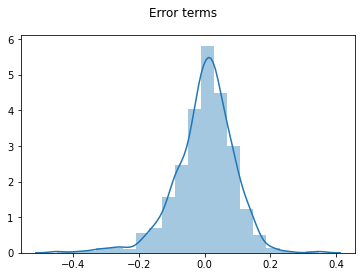

In [146]:
# error distribution plot

fig=plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20)
fig.suptitle('Error terms')


## Testing Model

In [147]:
#testframe


numerics=['temp','atemp','hum','windspeed','cnt']

testframe[numerics]=minmax.transform(testframe[numerics])

In [148]:
y_test=testframe.pop('cnt')

x_test=testframe

In [149]:
x_test_new=x_test[X.columns]
#x_test_new=X.columns
x_test_new.columns

Index(['holiday', 'temp', 'windspeed', 'year', 'workday', 'season2', 'season3',
       'season4', 'Sep', 'Oct', 'sun', 'Mist', 'Lightsnow'],
      dtype='object')

In [150]:
#y_predicted=lm.predict(x_test_new)
x_test_new=sm.add_constant(x_test_new)

x_test_new.columns


Index(['const', 'holiday', 'temp', 'windspeed', 'year', 'workday', 'season2',
       'season3', 'season4', 'Sep', 'Oct', 'sun', 'Mist', 'Lightsnow'],
      dtype='object')

In [151]:
x_test_new.shape

(220, 14)

In [152]:
y_predicted=lm.predict(x_test_new)

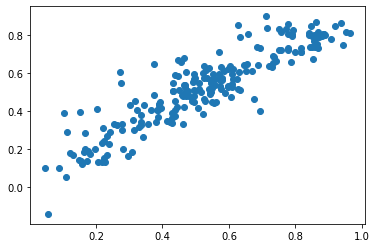

In [153]:
plt.scatter(y_test,y_predicted)

In [154]:
# statistical parameter of the test and train dataset

print(r2_score(y_test,y_predicted))
print(r2_score(y_train,y_train_cnt))

0.8143200336659837
0.8403512594095993


## Final Inference

- p-values for all the coefficients except holiday seem to be less than the significance level of 0.05. - meaning that all the predictors holiday are statistically significant.
- F-stats and Prob(F-stats) (overall model fit) - 200.8 and 5.16e-188(approx. 0.0) - Model fir is significant and explained 87% variance is just not by chance.
- R-sqaured and Adjusted R-squared (extent of fit) - 0.840 and 0.836 - 84% variance explained.With model r2_score as .84 nearly similar